In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

# Load datasets

## Vaccination data

In [2]:
# https://github.com/owid/covid-19-data/tree/master/public/data
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)

## List of used country data
Please add countries here if you want to see more of them

In [3]:
country_list = ['Germany', 'Norway', 'Sweden', 'Denmark', 'France', 'Spain', 'Italia', 'Netherlands']

## 14-day cases

In [4]:
url = "https://opendata.ecdc.europa.eu/covid19/nationalcasedeath/csv"
df_inf = pd.read_csv(url)
df_inf = df_inf[df_inf["indicator"]=="cases"]
df_inf2 = df_inf[df_inf["year_week"] > "2021-04"]


## Some local German data (not yet used properly, since German authorities do not use technology)

In [5]:
url = "https://opendata.rhein-kreis-neuss.de/explore/dataset/deutschland-corona-impfungen/download/?format=csv"
df_vac = pd.read_csv(url, sep=";")

# Main Information
## Vaccination data, one and two doses

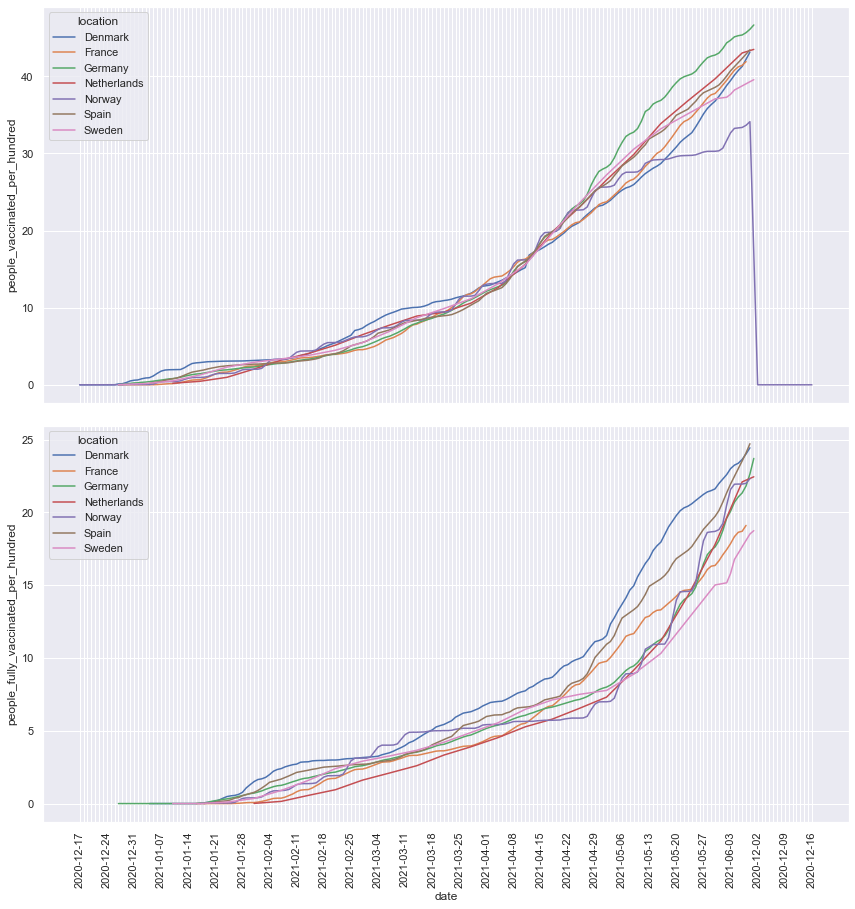

In [6]:
sns.set(rc={'figure.figsize':(12, 12)})
fig, ax = plt.subplots(2, 1, sharex=True)
fig.tight_layout()

plt.xticks(rotation=90)

g1 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_vaccinated_per_hundred", hue="location", ax=ax[0])

g2 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_fully_vaccinated_per_hundred", hue="location", ax=ax[1])

[l.set_visible(False) for (i,l) in enumerate(fig.gca().xaxis.get_ticklabels()) if i % 7 != 0];



# Vaccination rate based on both first and second dose -> percentage of doses to be set already being set

In [7]:
df['overall_percentage'] = (df['people_vaccinated_per_hundred'] + df['people_fully_vaccinated_per_hundred']) / 2

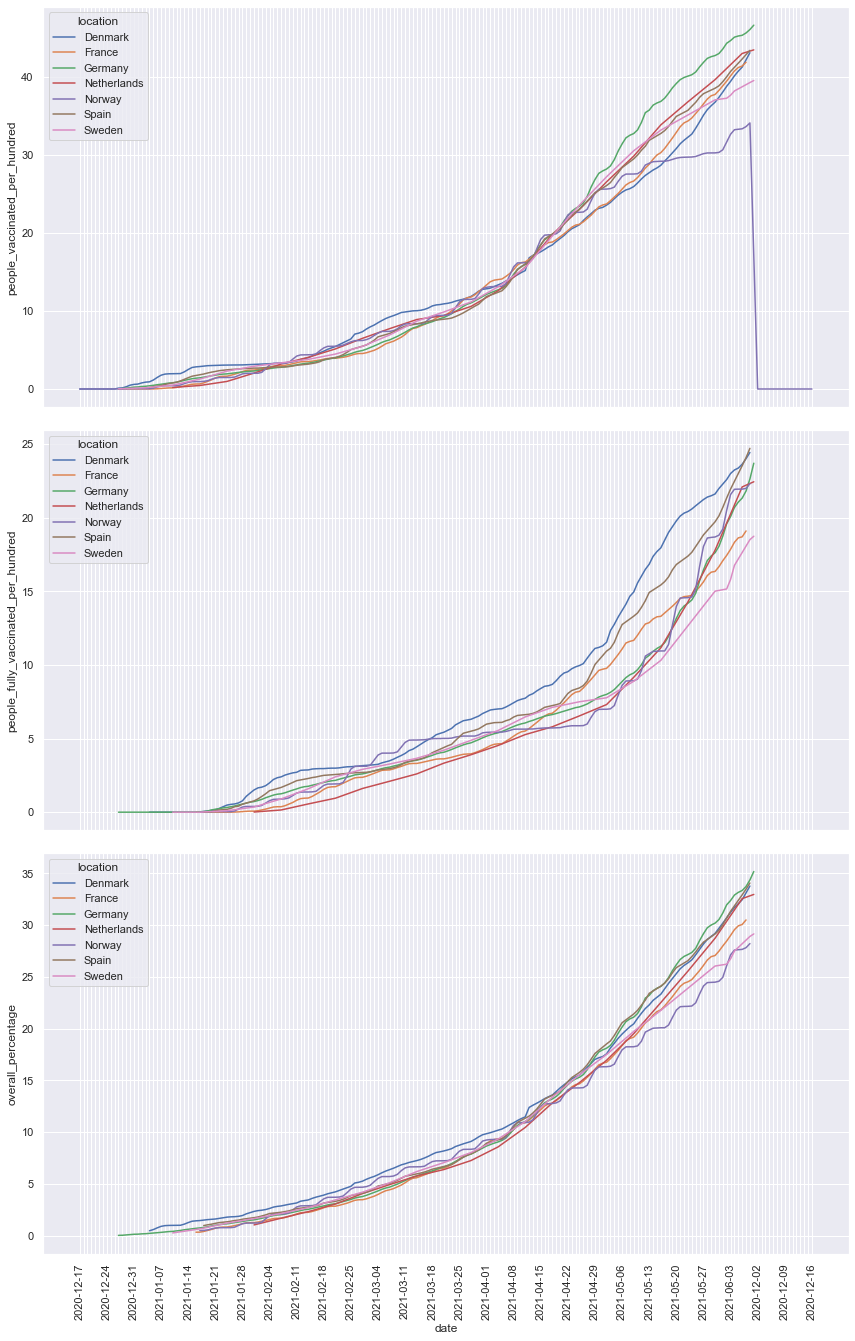

In [8]:
sns.set(rc={'figure.figsize':(12, 18)})
fig, ax = plt.subplots(3, 1, sharex=True)
fig.tight_layout()

plt.xticks(rotation=90)

g1 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_vaccinated_per_hundred", hue="location", ax=ax[0])

g2 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="people_fully_vaccinated_per_hundred", hue="location", ax=ax[1])

g3 = sns.lineplot(data=df[df['location'].isin(country_list)], x="date", y="overall_percentage", hue="location", ax=ax[2])

[l.set_visible(False) for (i,l) in enumerate(fig.gca().xaxis.get_ticklabels()) if i % 7 != 0];



## 14-days case rate per 100.000 inhabitants (from 2020)

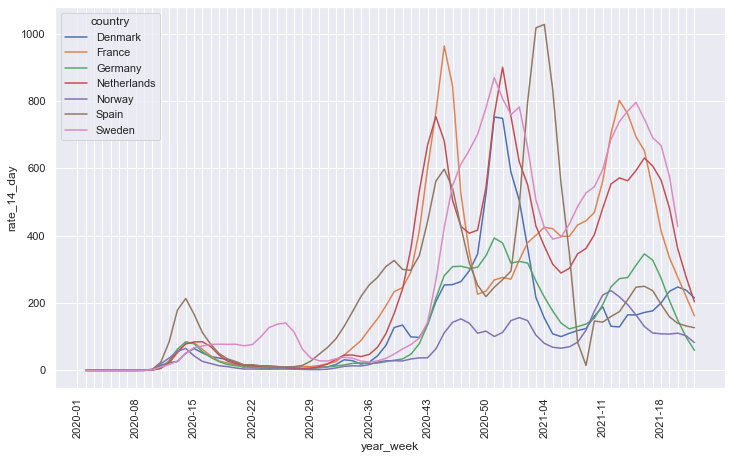

In [21]:
sns.set(rc={'figure.figsize':(12, 7)})
plt.xticks(rotation=90)

g = sns.lineplot(data=df_inf[df_inf['country'].isin(country_list)], x="year_week", y="rate_14_day", hue="country")
[l.set_visible(False) for (i,l) in enumerate(g.xaxis.get_ticklabels()) if i % 7 != 0];

## 14-days case rate per 100.000 inhabitants (from 2021)

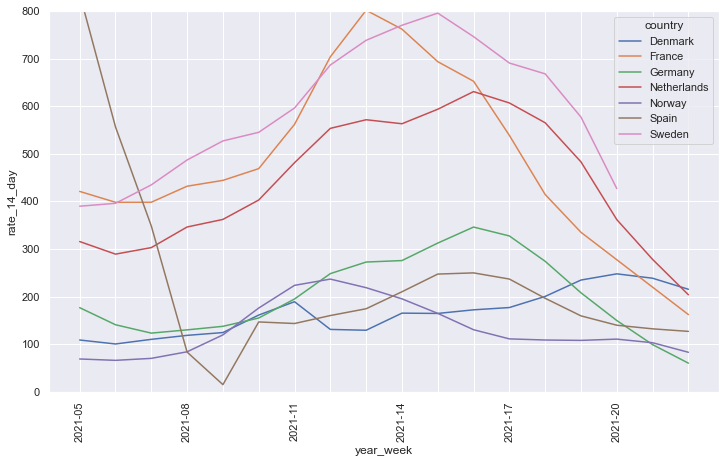

In [19]:
sns.set(rc={'figure.figsize':(12, 7)})
plt.xticks(rotation=90)

g = sns.lineplot(data=df_inf2[df_inf2['country'].isin(country_list)], x="year_week", y="rate_14_day", hue="country", ci=None)
plt.ylim(0, 800)
[l.set_visible(False) for (i,l) in enumerate(g.xaxis.get_ticklabels()) if i % 3 != 0];

# Format of data

## Vaccination data

In [11]:
df[df['location']=='Germany']

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,overall_percentage
8551,Germany,DEU,2020-12-27,23245.0,23228.0,17.0,NaN,NaN,0.03,0.03,0.00,NaN,0.015
8552,Germany,DEU,2020-12-28,40883.0,40827.0,56.0,17638.0,17638.0,0.05,0.05,0.00,211.0,0.025
8553,Germany,DEU,2020-12-29,90325.0,89545.0,780.0,49442.0,33540.0,0.11,0.11,0.00,400.0,0.055
8554,Germany,DEU,2020-12-30,151988.0,151082.0,906.0,61663.0,42914.0,0.18,0.18,0.00,512.0,0.090
8555,Germany,DEU,2020-12-31,202007.0,200952.0,1055.0,50019.0,44690.0,0.24,0.24,0.00,533.0,0.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8711,Germany,DEU,2021-06-05,54741856.0,37931647.0,17644049.0,405039.0,698937.0,65.34,45.27,21.06,8342.0,33.165
8712,Germany,DEU,2021-06-06,55029355.0,38007606.0,17870385.0,287499.0,699120.0,65.68,45.36,21.33,8344.0,33.345
8713,Germany,DEU,2021-06-07,55620978.0,38251640.0,18272108.0,591623.0,706600.0,66.39,45.66,21.81,8434.0,33.735
8714,Germany,DEU,2021-06-08,56611514.0,38621783.0,18959796.0,990536.0,708247.0,67.57,46.10,22.63,8453.0,34.365


## 14-day cases

In [12]:
df_inf[df_inf["country"]=="Germany"]

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source
10752,Germany,DEU,Europe,83166711,cases,0.0,2020-01,NaN,0.0,"Epidemic intelligence, national weekly data"
10753,Germany,DEU,Europe,83166711,cases,0.0,2020-02,0.000000,0.0,"Epidemic intelligence, national weekly data"
10754,Germany,DEU,Europe,83166711,cases,0.0,2020-03,0.000000,0.0,"Epidemic intelligence, national weekly data"
10755,Germany,DEU,Europe,83166711,cases,0.0,2020-04,0.000000,0.0,"Epidemic intelligence, national weekly data"
10756,Germany,DEU,Europe,83166711,cases,9.0,2020-05,0.010822,9.0,"Epidemic intelligence, national weekly data"
...,...,...,...,...,...,...,...,...,...,...
10822,Germany,DEU,Europe,83166711,cases,101269.0,2021-18,274.059173,3527251.0,"Epidemic intelligence, national weekly data"
10823,Germany,DEU,Europe,83166711,cases,71595.0,2021-19,207.852394,3598846.0,"Epidemic intelligence, national weekly data"
10824,Germany,DEU,Europe,83166711,cases,52794.0,2021-20,149.565852,3651640.0,"Epidemic intelligence, national weekly data"
10825,Germany,DEU,Europe,83166711,cases,29486.0,2021-21,98.933815,3681126.0,"Epidemic intelligence, national weekly data"
